In [326]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

### Load the data and get means

In [327]:
file_name = "./data/full_bus_data_high_confidence.csv"

bus_data = pd.read_csv(file_name)

/var/folders/xt/5my4_t657l5dvcsk9ybkb_ww0000gn/T/ipykernel_77448/2233828969.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  bus_data = pd.read_csv(file_name)


In [328]:
# Fixing a problem that occurred with Gemini
bus_data.loc[
    bus_data["good_name"] == "Finch Ave West at Yonge St - Finch Station", 
    ["good_name", "stop_lat", "stop_lon"]
] = ["Finch Station", 43.780942, -79.414829]
bus_data.loc[
    bus_data["good_name"] == "Kennedy Rd at Eglinton Ave East", 
    ["good_name", "stop_lat", "stop_lon"]
] = ["Kennedy Station",43.732502,-79.263315]
bus_data.to_csv(file_name, index = False)

In [329]:
# drop outliers (display these later)
super_delays = bus_data[bus_data["Min Delay"]>60].dropna()
super_delays = super_delays[super_delays["Min Delay"]<1000]
bus_data = bus_data[bus_data["Min Delay"]<=60] 

bus_data["stop_lat_blurred"] = np.round(bus_data["stop_lat"]*100)/100
bus_data["stop_lon_blurred"] = np.round(bus_data["stop_lon"]*100)/100

mean_bus_data_blurred = bus_data.groupby(["stop_lat_blurred", "stop_lon_blurred"])[["Min Delay", "Min Gap"]].mean().reset_index()
count_bus_data_blurred = bus_data.groupby(["stop_lat_blurred", "stop_lon_blurred"])[["Min Delay", "Min Gap"]].count().reset_index()

count_bus_data = bus_data.groupby(["stop_lat", "stop_lon"])[["Min Delay", "Min Gap"]].count().reset_index()
mean_bus_data = bus_data.groupby(["stop_lat", "stop_lon"])[["Min Delay", "Min Gap"]].mean().reset_index()
super_means = super_delays.groupby(["stop_lat", "stop_lon"])[["Min Delay", "Min Gap"]].mean().reset_index()

display(mean_bus_data)

,stop_lat,stop_lon,Min Delay,Min Gap
0,43.592111,-79.543700,16.779683,33.163588
1,43.592468,-79.541863,15.111111,30.222222
2,43.592820,-79.541218,14.166667,25.000000
3,43.593263,-79.539318,23.400000,40.800000
4,43.593334,-79.538348,9.166667,18.166667
...,...,...,...,...
5309,43.903427,-79.294134,40.000000,80.000000
5310,43.904534,-79.267211,23.600000,47.200000
5311,43.907142,-79.277864,39.500000,79.000000
5312,43.908378,-79.273087,27.666667,55.083333


In [330]:
lat = mean_bus_data["stop_lat"]
lon = mean_bus_data["stop_lon"]
delay = mean_bus_data["Min Delay"]
super_lat = super_means["stop_lat"]
super_lon = super_means["stop_lon"]
super_delay = super_means["Min Gap"]
blurred_lat = mean_bus_data_blurred["stop_lat_blurred"]
blurred_lon = mean_bus_data_blurred["stop_lon_blurred"]
blurred_delay = mean_bus_data_blurred["Min Delay"]
count_lat = count_bus_data_blurred["stop_lat_blurred"]
count_lon = count_bus_data_blurred["stop_lon_blurred"]
count_delay = count_bus_data_blurred["Min Delay"]


In [331]:
print(min(lat), min(lon), max(lat), max(lon))

43.592111 -79.649766 43.909707 -79.123111


## Analysis by stop location excluding outliers

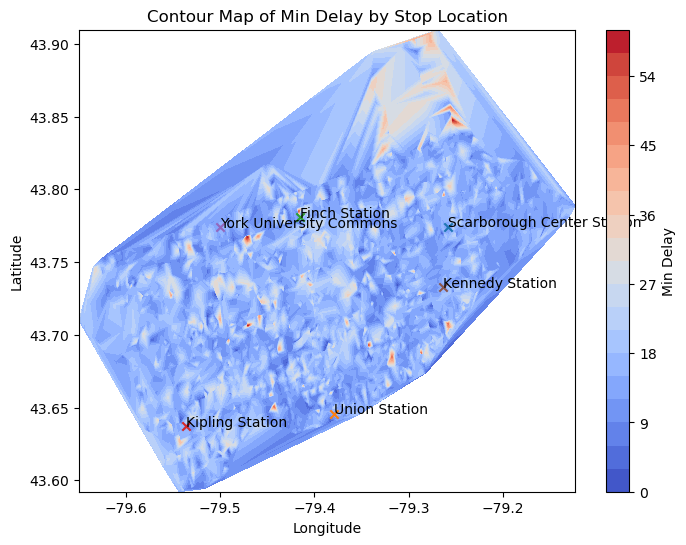

In [339]:
fig1, ax1 = plt.subplots(figsize=(8, 6))
contour1 = ax1.tricontourf(lon, lat, delay, levels=20, cmap='coolwarm')
plt.colorbar(contour1, label="Min Delay")
plt.scatter(-79.258185,43.774257, marker="x")
plt.annotate("Scarborough Center Station", (-79.258185,43.774257))
plt.scatter(-79.37921,43.645652, marker="x")
plt.annotate("Union Station", (-79.37921,43.645652))
plt.scatter(-79.414829,43.780942, marker="x")
plt.annotate("Finch Station", (-79.414829,43.780942))
plt.scatter(-79.536117,43.637209, marker="x")
plt.annotate("Kipling Station", (-79.536117,43.637209))
plt.scatter(-79.499888,43.774097, marker="x")
plt.annotate("York University Commons", (-79.499888,43.774097))
plt.scatter(-79.263315,43.732502, marker="x")
plt.annotate("Kennedy Station", (-79.263315,43.732502))
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
ax1.set_title("Contour Map of Min Delay by Stop Location")

plt.show()

Text(0.5, 0.92, '3D Plot of Min Delay by Stop Location')

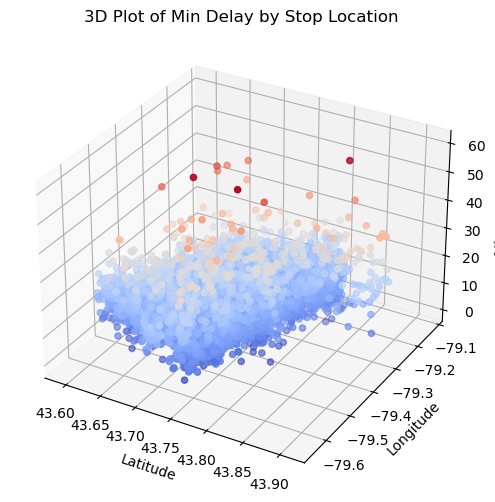

In [340]:
fig1 = plt.figure(figsize=(10, 6))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(lat, lon, delay, c=delay, cmap='coolwarm', marker='o')
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Longitude")
ax1.set_zlabel("Min Delay")
ax1.set_title("3D Plot of Min Delay by Stop Location")

### Blurred

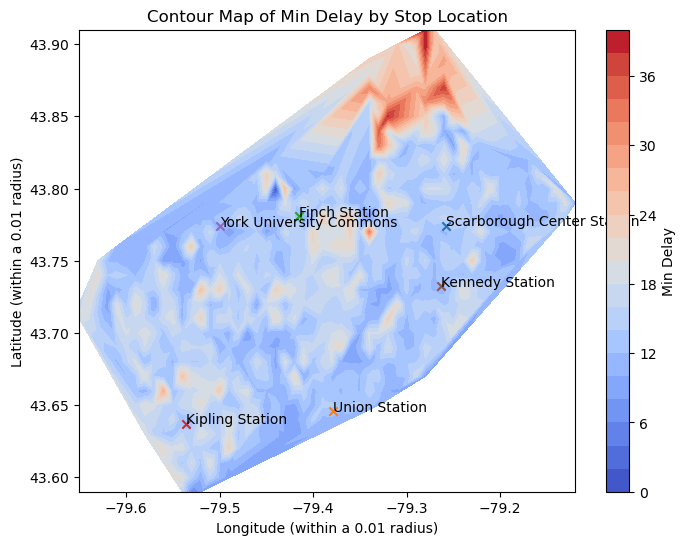

In [342]:
fig1, ax1 = plt.subplots(figsize=(8, 6))
contour1 = ax1.tricontourf(blurred_lon, blurred_lat, blurred_delay, levels=20, cmap='coolwarm')
plt.colorbar(contour1, label="Min Delay")
plt.scatter(-79.258185,43.774257, marker="x")
plt.annotate("Scarborough Center Station", (-79.258185,43.774257))
plt.scatter(-79.37921,43.645652, marker="x")
plt.annotate("Union Station", (-79.37921,43.645652))
plt.scatter(-79.414829,43.780942, marker="x")
plt.annotate("Finch Station", (-79.414829,43.780942))
plt.scatter(-79.536117,43.637209, marker="x")
plt.annotate("Kipling Station", (-79.536117,43.637209))
plt.scatter(-79.499888,43.774097, marker="x")
plt.annotate("York University Commons", (-79.499888,43.774097))
plt.scatter(-79.263315,43.732502, marker="x")
plt.annotate("Kennedy Station", (-79.263315,43.732502))
ax1.set_xlabel("Longitude (within a 0.01 radius)")
ax1.set_ylabel("Latitude (within a 0.01 radius)")
ax1.set_title("Contour Map of Min Delay by Stop Location")

plt.show()

Text(0.5, 0.92, '3D Plot of Min Delay by Stop Location')

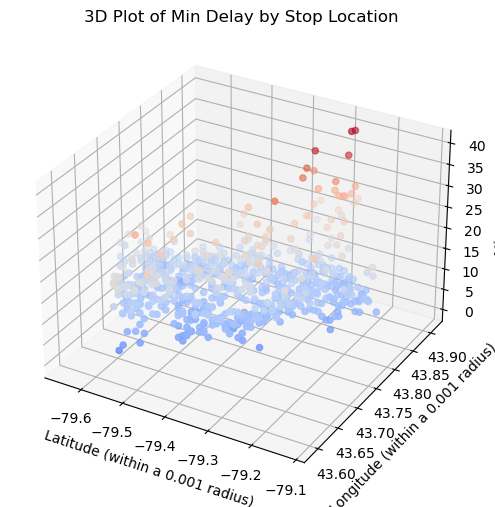

In [335]:
fig1 = plt.figure(figsize=(10, 6))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(blurred_lon, blurred_lat, blurred_delay, c=blurred_delay, cmap='coolwarm', marker='o')
ax1.set_xlabel("Latitude (within a 0.001 radius)")
ax1.set_ylabel("Longitude (within a 0.001 radius)")
ax1.set_zlabel("Min Delay")
ax1.set_title("3D Plot of Min Delay by Stop Location")

### Analysis By Delay Count

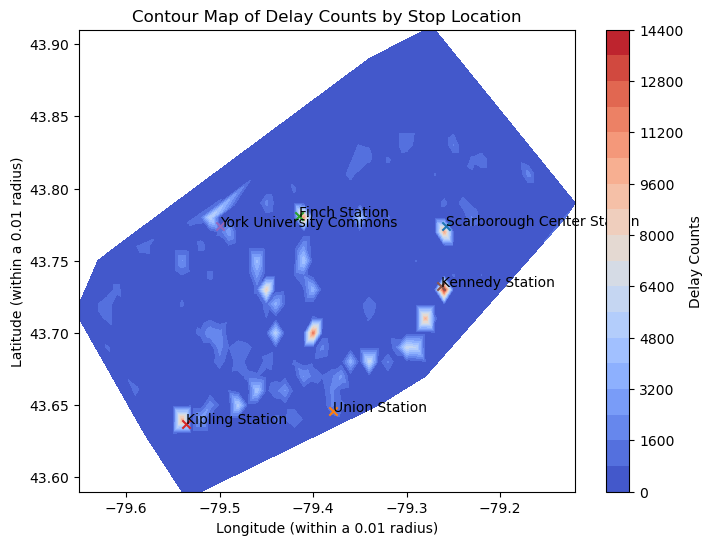

In [343]:
fig1, ax1 = plt.subplots(figsize=(8, 6))
contour1 = ax1.tricontourf(count_lon, count_lat, count_delay, levels=20, cmap='coolwarm')
plt.colorbar(contour1, label="Delay Counts")
plt.scatter(-79.258185,43.774257, marker="x")
plt.annotate("Scarborough Center Station", (-79.258185,43.774257))
plt.scatter(-79.37921,43.645652, marker="x")
plt.annotate("Union Station", (-79.37921,43.645652))
plt.scatter(-79.414829,43.780942, marker="x")
plt.annotate("Finch Station", (-79.414829,43.780942))
plt.scatter(-79.536117,43.637209, marker="x")
plt.annotate("Kipling Station", (-79.536117,43.637209))
plt.scatter(-79.499888,43.774097, marker="x")
plt.annotate("York University Commons", (-79.499888,43.774097))
plt.scatter(-79.263315,43.732502, marker="x")
plt.annotate("Kennedy Station", (-79.263315,43.732502))
ax1.set_xlabel("Longitude (within a 0.01 radius)")
ax1.set_ylabel("Latitude (within a 0.01 radius)")
ax1.set_title("Contour Map of Delay Counts by Stop Location")

plt.show()

In [337]:
top_50_delay_stops = count_bus_data.nlargest(50, "Min Delay")
stop_data = pd.read_csv("./data/stops.txt")
stop_data = stop_data[["stop_name", "stop_lat", "stop_lon"]]
stop_data = stop_data.drop_duplicates(subset="stop_name", keep="first")
stop_names = top_50_delay_stops.merge(stop_data, on=["stop_lat","stop_lon"], how="left")
display(stop_names)

,stop_lat,stop_lon,Min Delay,Min Gap,stop_name
0,43.732502,-79.263315,13388,13385,Kennedy Station
1,43.780942,-79.414829,10234,10230,Finch Station
2,43.774257,-79.258185,9678,9677,Scarborough Centre Station
3,43.637209,-79.536117,9555,9548,Kipling Station
4,43.709817,-79.280007,9302,9301,Warden Station
5,43.704314,-79.398308,9081,9078,Eglinton Station
6,43.734475,-79.450920,8019,8017,Wilson Station
7,43.689037,-79.301926,5424,5423,Main Street Station
8,43.776668,-79.508937,5394,5380,Pioneer Village Station
9,43.680066,-79.344974,5292,5292,Pape Station


## Outlier Analysis - High Delay Time Locations

ValueError: x and y arrays must have a length of at least 3

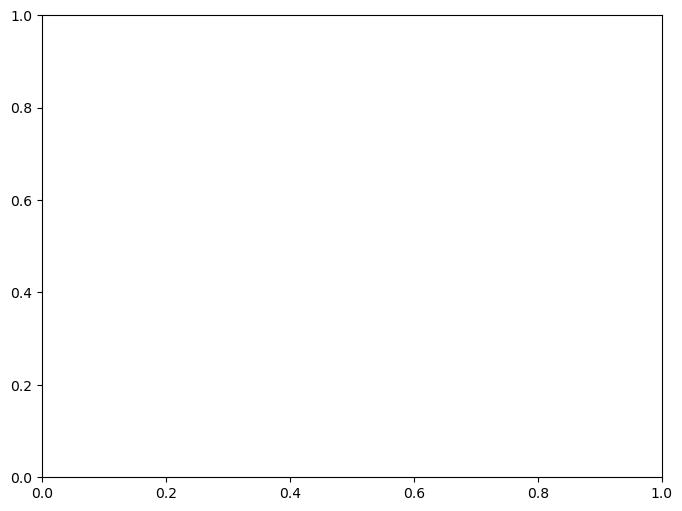

In [338]:
fig1, ax1 = plt.subplots(figsize=(8, 6))
contour1 = ax1.tricontourf(super_lon, super_lat, super_delay, levels=20, cmap='coolwarm')
plt.colorbar(contour1, label="Min Delay")
plt.scatter(-79.258185,43.774257, marker="x")
plt.annotate("Scarborough Center Station", (-79.258185,43.774257))
plt.scatter(-79.37921,43.645652, marker="x")
plt.annotate("Union Station", (-79.37921,43.645652))
plt.scatter(-79.414829,43.780942, marker="x")
plt.annotate("Finch Station", (-79.414829,43.780942))
plt.scatter(-79.536117,43.637209, marker="x")
plt.annotate("Kipling Station", (-79.536117,43.637209))
plt.scatter(-79.499888,43.774097, marker="x")
plt.annotate("York University Commons", (-79.499888,43.774097))
plt.scatter(-79.267673,43.731911, marker="x")
plt.annotate("Kennedy Rd at Eglinton Ave East", (-79.267673,43.731911))
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
ax1.set_title("Contour Map of Outlier Delays (over 60 minutes) by Stop Location")

plt.show()

Text(0.5, 0.92, '3D Plot of Outlier Delays (over 60 minutes) by Stop Location')

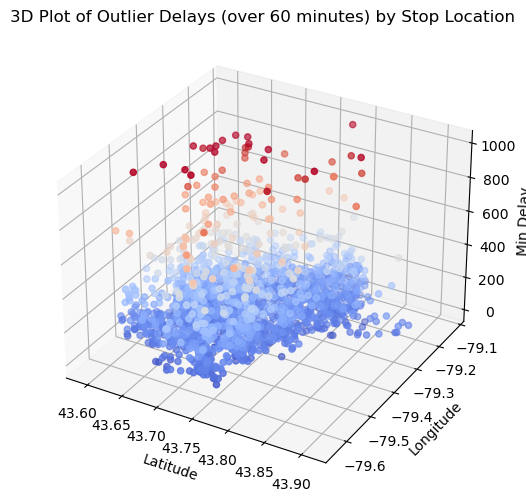

In [ ]:
fig1 = plt.figure(figsize=(10, 6))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(super_lat, super_lon, super_delay, c=super_delay, cmap='coolwarm', marker='o')
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Longitude")
ax1.set_zlabel("Min Delay")
ax1.set_title("3D Plot of Outlier Delays (over 60 minutes) by Stop Location")

In [ ]:
top_50_delay_stops = mean_bus_data.nlargest(50, "Min Delay")
stop_data = pd.read_csv("./data/stops.txt")
stop_data = stop_data[["stop_name", "stop_lat", "stop_lon"]]
stop_data = stop_data.drop_duplicates(subset="stop_name", keep="first")
stop_names = top_50_delay_stops.merge(stop_data, on=["stop_lat","stop_lon"], how="left")
display(stop_names)

,stop_lat,stop_lon,Min Delay,Min Gap,stop_name
0,43.706261,-79.470895,60.000000,120.000000,Sheffield St at Hafis Rd North Side
1,43.767311,-79.471206,60.000000,70.000000,Champagne Dr at Finch Ave West
2,43.847622,-79.253399,60.000000,83.000000,Markham Rd at New Delhi Dr
3,43.692886,-79.342285,54.000000,74.000000,Donlands Ave at Plains Rd
4,43.784823,-79.416630,53.000000,69.000000,5799 Yonge St
5,43.650684,-79.442777,51.000000,56.000000,Dundas St West at Sterling Rd
6,43.707574,-79.257757,51.000000,71.000000,Kennedy Rd at Mewburn Ave
7,43.684726,-79.317555,50.000000,80.000000,Danforth Ave at Glebemount Ave
8,43.687474,-79.286664,50.000000,66.000000,Victoria Park Ave at Gerrard St East North Side
9,43.856591,-79.255581,47.000000,80.000000,Markham Rd at 14Th Ave
